# Introduction to the data
Pixar Animation has a lot of movies in its repertory and is widely consdired as one of the best animation studios in the world. In this project, we will analyse the reviews and earnings of a sample of 15 movies on pixar
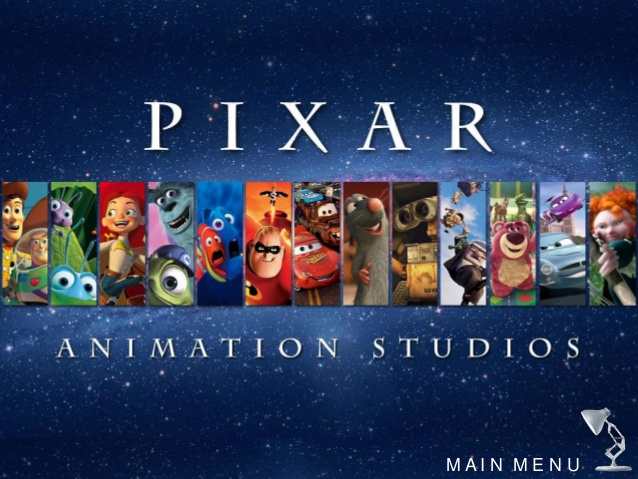

# Read and Explore Data

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pixar_movies = pd.read_csv("PixarMovies.csv")
# Number of rows
print(pixar_movies.shape[0])

15


In [24]:
# Number of columns
print(pixar_movies.shape[1])

16


In [25]:
pixar_movies.head(15)

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3.0,0.0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1.0,0.0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1.0,0.0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3.0,1.0
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4.0,1.0
5,2004,The Incredibles,115,97,8.0,90,70.47,631.4,261.4,341.28,370.0,41.40%,58.60%,92,4.0,2.0
6,2006,Cars,116,74,7.2,73,60.12,462.0,244.1,302.59,217.9,52.84%,47.16%,70,2.0,0.0
7,2007,Ratatouille,111,96,8.0,96,47.00,623.7,206.4,243.65,417.3,33.09%,66.91%,150,5.0,1.0
8,2008,WALL-E,97,96,8.4,94,63.10,521.3,223.8,253.11,297.5,42.93%,57.07%,180,6.0,1.0
9,2009,Up,96,98,8.3,88,68.11,731.3,293.0,318.90,438.3,40.07%,59.93%,175,5.0,2.0


In [26]:
pixar_movies.dtypes

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object

It is to be noted that the end date of the data for this project is November 2015. As such, Oscar nominated and winning films like the Good Dinosaur is absent from the dataset

# Data Cleaning

In [27]:
# Use the `str` attribute followed by the string method `rstrip()` to apply the string method 
# to every value in the column.  Use the `astype()` method to cast the column to the float data type.
pixar_movies["Domestic %"] = pixar_movies["Domestic %"].str.rstrip("%").astype("float")
pixar_movies["International %"] = pixar_movies["International %"].str.rstrip("%").astype("float")

In [28]:
# Multiply the `IMDB Score` column by 10
pixar_movies["IMDB Score"] = pixar_movies["IMDB Score"]*10

In [29]:
# Create a new DataFrame containing only the first 14 rows.
filtered_pixar = pixar_movies.loc[0:13]

In [30]:
# Set the `Movie` column as the index for the DataFrame.
pixar_movies.set_index("Movie", inplace=True)
filtered_pixar.set_index("Movie", inplace=True)

In [31]:
pixar_movies

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
Movie,,,,,,,,,,,,,,,
Toy Story,1995,81,100,83.0,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3.0,0.0
A Bug's Life,1998,96,92,72.0,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1.0,0.0
Toy Story 2,1999,92,100,79.0,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1.0,0.0
"Monsters, Inc.",2001,90,96,81.0,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3.0,1.0
Finding Nemo,2003,104,99,82.0,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4.0,1.0
The Incredibles,2004,115,97,80.0,90,70.47,631.4,261.4,341.28,370.0,41.40,58.60,92,4.0,2.0
Cars,2006,116,74,72.0,73,60.12,462.0,244.1,302.59,217.9,52.84,47.16,70,2.0,0.0
Ratatouille,2007,111,96,80.0,96,47.00,623.7,206.4,243.65,417.3,33.09,66.91,150,5.0,1.0
WALL-E,2008,97,96,84.0,94,63.10,521.3,223.8,253.11,297.5,42.93,57.07,180,6.0,1.0


# Reviews Analysis - Data visualization, line plots

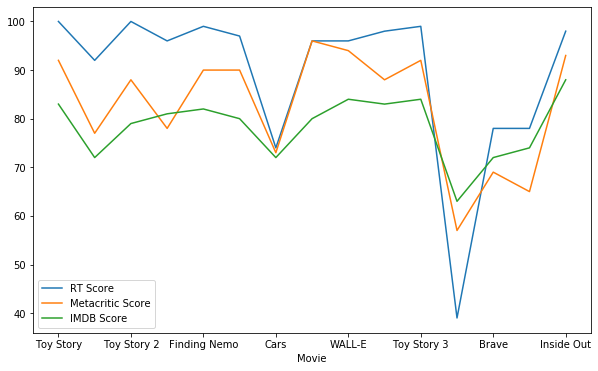

In [32]:
critics_reviews = pixar_movies[["RT Score","Metacritic Score","IMDB Score"]]
critics_reviews.plot(figsize=(10,6))

# Reviews Analysis - data visualization, box plot

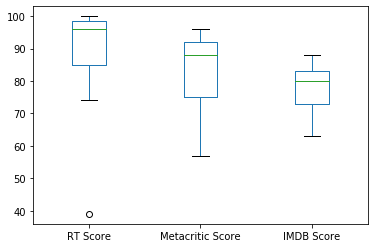

In [33]:
pixar_movies[["RT Score","Metacritic Score","IMDB Score"]].plot(kind="box")

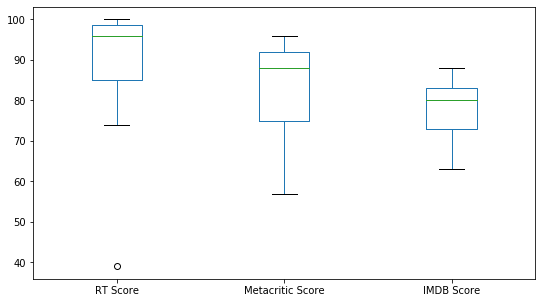

In [34]:
pixar_movies[["RT Score","Metacritic Score","IMDB Score"]].plot(kind="box", figsize=(9,5))

# Revenue Analysis - data visualization, stacked bar plots

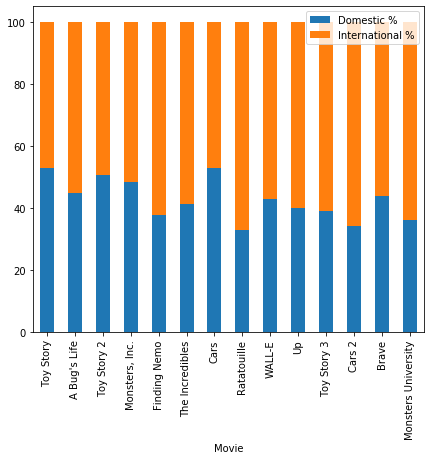

In [35]:
revenue_proportions = filtered_pixar[["Domestic %", "International %"]]
revenue_proportions.plot(kind='bar', stacked=True, figsize=(7,6))

# Oscar Nominations, Oscar Wins

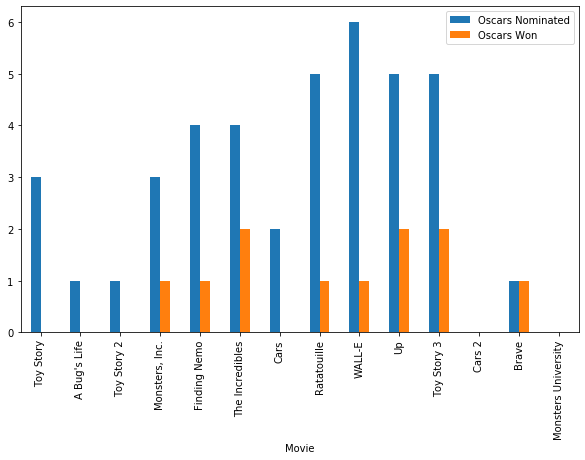

In [36]:
# Grouped bar plot for oscar nominations / oscars won
filtered_pixar[["Oscars Nominated","Oscars Won"]].plot(kind='bar', figsize=(10,6))